#  Un cadavre exquis pour découvrir Git

<!--- Inspirations
https://github.com/corent01/03-Swartz/blob/master/Parcours/01-La-prairie/git/exercice-git-cadavre-exquis.md
https://github.com/simplonco/cadavre-request
------>


<a href="https://github.com/linogaliana/python-datascientist/blob/master//__w/python-datascientist/python-datascientist/notebooks/course/git/exogit.ipynb" class="github"><i class="fab fa-github"></i></a>
[![Download](https://img.shields.io/badge/Download-Notebook-important?logo=Jupyter)](https://downgit.github.io/#/home?url=https://github.com/linogaliana/python-datascientist/blob/master//__w/python-datascientist/python-datascientist/notebooks/course/git/exogit.ipynb)
[![nbviewer](https://img.shields.io/badge/Visualize-nbviewer-blue?logo=Jupyter)](https://nbviewer.jupyter.org/github/linogaliana/python-datascientist/blob/master//__w/python-datascientist/python-datascientist/notebooks/course/git/exogit.ipynb)
[![Onyxia](https://img.shields.io/badge/SSPcloud-Tester%20via%20SSP--cloud-informational&color=yellow?logo=Python)](https://datalab.sspcloud.fr/launcher/inseefrlab-helm-charts-datascience/jupyter?onyxia.friendlyName=«python-datascientist»&resources.requests.memory=«4Gi»&security.allowlist.enabled=false&init.personalInit=«https://raw.githubusercontent.com/linogaliana/python-datascientist/master/init_onyxia.sh»)
[![Binder](https://img.shields.io/badge/Launch-Binder-E66581.svg?logo=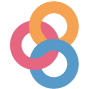)](https://mybinder.org/v2/gh/linogaliana/python-datascientist/master?filepath=/__w/python-datascientist/python-datascientist/notebooks/course/git/exogit.ipynb)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](http://colab.research.google.com/github/linogaliana/python-datascientist/blob/master//__w/python-datascientist/python-datascientist/notebooks/course/git/exogit.ipynb)

Les exercices suivants sont inspirés d'un cours de Git que j'ai construit
à l'Insee et dont les ressources sont disponibles
[ici](https://linogaliana.gitlab.io/collaboratif/git.html). L'idée
du cadavre exquis, qui m'a été inspirée par
[Romain Lesur](https://github.com/RLesur) est inspirée de
[cette ressource](https://github.com/corent01/03-Swartz/blob/master/Parcours/01-La-prairie/git/exercice-git-cadavre-exquis.md) et de [celle-ci](https://github.com/simplonco/cadavre-request)

Cette partie part du principe que les concepts généraux de Git sont
maîtrisés et qu'un environnement de travail fonctionnel avec `Git` est
disponible. Un exemple de tel environnement est le JupyterLab du 
SSPCloud où une extension
`Git` est pré-installée: 

[![Onyxia](https://img.shields.io/badge/SSPcloud-Tester%20via%20SSP--cloud-informational&color=yellow?logo=Python)](https://datalab.sspcloud.fr/launcher/inseefrlab-helm-charts-datascience/jupyter?onyxia.friendlyName=«python-datascientist»&resources.requests.memory=«4Gi»&security.allowlist.enabled=false&init.personalInit=«https://raw.githubusercontent.com/linogaliana/python-datascientist/master/init_onyxia.sh»)

Outre le [chapitre précédent](#introgit), il existe de
nombreuses ressources sur internet sur le sujet, notamment
[le cours de Git déjà cité](https://linogaliana.gitlab.io/collaboratif/git.html)
et des ressources `utilitR`
([des éléments sur la configuration](https://www.book.utilitr.org/git-config.html)
et [pratique sur RStudio](https://www.book.utilitr.org/git.html)).

L'idée de ce chapitre est d'amener, progressivement, à la mise en oeuvre
de pratiques collaboratives devenues standards dans le domaine de l'open-source
mais également de plus en plus communes dans les administrations et entreprises
de la data-science. 

Ce chapitre propose d'utiliser l'extension Git de JupyterLab.
Un tutoriel présentant cette extension est disponible
[ici](https://annefou.github.io/jupyter_publish/02-git/index.html). 
Les principaux IDE disponibles (Visual Studio,
PyCharm, RStudio) présentent des fonctionalités similaires. Il est
tout à fait possible d'en utiliser un autre. VisualStudio propose
probablement, à l'heure actuelle, l'ensemble le plus complet. 

Certains passages de ce TD nécessitent d'utiliser la ligne de commande.
Il est tout à fait possible de réaliser ce TD entièrement avec celle-ci.
Cependant, pour une personne débutante en `Git`, l'utilisation d'une 
interface graphique peut constituer un élément important pour
la compréhension et l'adoption de `Git`. Une fois à l'aise avec
`Git`, on peut tout à fait se passer des interfaces graphiques
pour les routines quotidiennes et ne les utiliser que
pour certaines opérations où elles s'avèrent fort pratiques
(notamment la comparaison de deux fichiers avant de devoir fusionner).


# Configuration du compte Github

## Rappels sur la notion de dépôt distant

Pour rappel, comme expliqué précédemment, il convient de distinguer
le dépôt distant (*remote*) et la copie ou les copies locales (les *clones*)
d'un dépôt. Le dépôt distant est généralement stocké sur une forge 
logicielle (`Github` ou `Gitlab`) et sert à centraliser la version
collective d'un projet. Les copies locales sont des copies de travail
qu'on utilise pour faire évoluer un projet:

![](https://www.book.utilitr.org/pics/git/gitlab.png)

`Git` est un système de contrôle de version asynchrone c'est-à-dire
qu'on n'interagit pas en continu avec le dépôt distant (comme c'est le
cas dans le système SVN) mais qu'il est possible d'avoir une version
locale qui se différencie du dépôt commun et qu'on rend cohérente
de temps en temps. 

Bien qu'il soit possible d'avoir une utilisation hors-ligne de `Git`, 
c'est-à-dire un pur contrôle de version local sans dépôt
distant, cela est une utilisation
rare et qui comporte un intérêt limite. L'intérêt de `Git` est
d'offrir une manière robuste et efficace d'interagir avec un 
dépôt distant facilitant ainsi la collaboration en équipe ou en
solitaire. 

Pour ces exercices, je propose d'utiliser `Github` dont les fonctionalités
nous suffiront amplement[^1]. Si, 
dans le futur, les fonctionnalités ne vous conviennent pas (sans l'apport de fonctionnalités
externes, `Github` propose moins de fonctionalités que `Gitlab`) ou si vous êtes
mal à l'aise concernant le possesseur de `Github` (Microsoft), vous pourrez utiliser
`Gitlab` <i class="fab fa-gitlab"></i>, son concurrent.
L'avantage de `Github` par rapport à `Gitlab` est que le premier est plus visible, car
mieux indexé par `Google` et concentre, en partie pour des raisons historiques, plus
de développeurs `Python` et `R` (ce qui est important dans des domaines comme
le code où les externalités de réseau jouent). Le débat `Github` vs `Gitlab` n'a
plus beaucoup de sens aujourd'hui car les fonctionnalités ont convergé (`Github` 
a rattrapé une partie de son retard sur l'intégration continue) et, de toute
manière, on peut tout à fait connecter des dépôts `Gitlab` et `Github`. 

[^1]: Dans sa version en ligne, `Github` (<https://github.com>)
dispose de plus de visibilité que `Gitlab` (<https://gitlab.com>). 
L'avantage que comportait Gitlab par rapport à Github 
à une époque, à savoir la possibilité de disposer gratuitement de ressources
pour faire de l'intégration continue, c'est résorbé depuis que Github
a lancé son service Github Actions. Cependant, être familiarisé à 
l'environnement Gitlab reste utile car beaucoup de forges logicielles
internes reposent sur les fonctionalités open-source (l'interface graphique
en faisant parti) de `Gitlab`. Il est donc fort utile de maîtriser 
les fonctionalités coeur de ces deux interfaces qui sont en fait quasi-identiques. 

## Première étape: créer un compte `Github`

Les deux premières étapes se font sur `Github`

**Exercice 1: créer un compte Github**

1. Si vous n'en avez pas déjà un, créer un compte sur https://github.com
2. Créer un dépôt vide. Créez ce dépôt **privé**, cela permettra
dans l'exercice 2 d'activer notre jeton. Vous pourrez le rendre public
après l'exercice 2, c'est comme vous le souhaitez.

## Deuxième étape: créer un *token* (jeton) HTTPS

## Principe

`Git` est un système décentralisé de contrôle de version :
les codes sont modifiés par chaque personne sur son poste de travail,
puis sont mis en conformité avec la version collective disponible
sur le dépôt distant au moment où le contributeur le décide.

Il est donc nécessaire que la forge connaisse l’identité de chacun des
contributeurs, afin de déterminer qui est l’auteur d’une modification apportée
aux codes stockés dans le dépôt distant.
Pour que `Github` reconnaisse un utilisateur proposant des modifications,
il est nécessaire de s’authentifier (un dépôt distant, même public, ne peut pas être modifié par n’importe qui). L’authentification consiste ainsi à fournir un élément que seul vous et la forge sont censés connaître : un mot de passe, une clé compliquée, un jeton d’accès...

Plus précisément, il existe deux modalités pour faire connaître son identité à `Github` :

* une authentification HTTPS (décrite ici) : l’authentification se fait avec un login et un mot de passe (qu’il faut renseigner à chaque interaction avec le dépôt), ou avec un token (méthode à privilégier).
* une authentification SSH : l’authentification se fait par une clé cryptée disponible sur le poste de travail et que GitHub ou GitLab connaît. Une fois configurée, cette méthode ne nécessite plus de faire connaître son identité : l’empreinte digitale que constitue la clé suffit à reconnaître un utilisateur.

La [documentation collaborative `utilitR`](https://www.book.utilitr.org/git-config.html#interaction-avec-un-d%C3%A9p%C3%B4t-distant-principe) présente les raisons pour lesquelles il convient de favoriser
la méthode HTTPS sur la méthode SSH. 

Depuis août 2021, `Github` n'autorise plus l'authentification par mot de passe
lorsqu'on interagit (`pull`/`push`) avec un dépôt distant
([raisons ici](https://github.blog/changelog/2021-08-12-git-password-authentication-is-shutting-down/)).
Il est nécessaire d'utiliser un *token* (jeton d'accès) qui présente l'avantage
d'être révoquable (on peut à tout moment supprimer un jeton si, par exemple,
on suspecte qu'il a été diffusé par erreur) et à droits limités 
(le jeton permet certaines opérations standards mais
n'autorise pas certaines opérations déterminantes comme la suppression
d'un dépôt)

Il est important de ne jamais stocker un _token_, et encore moins son mot de passe, dans un projet.
Il est possible de stocker un mot de passe ou *token* de manière sécurisée et durable
avec le *credential helper* de `Git`. Celui-ci est présenté par la suite.

S'il n'est pas possible d'utiliser le *credential helper* de `Git`, un mot de passe 
ou _token_ peut être stocké de manière sécurisé dans
un système de gestion de mot de passe comme [Keepass](https://keepass.fr/).

Ne jamais stocker un jeton `Github`, ou pire un mot de passe, dans un fichier
texte non crypté. Les logiciels de gestion de mot de passe
(comme [Keepass](https://keepass.fr/), recommandé par l'Anssi)
sont simples
d'usage et permettent de ne conserver sur l'ordinateur qu'une version
hashée du mot de passe qui ne peut être décryptée qu'avec un mot de passe
connu de vous seuls. 

## Créer un jeton

La [documentation officielle](https://docs.github.com/en/authentication/keeping-your-account-and-data-secure/creating-a-personal-access-token) comporte un certain nombre de captures d'écran expliquant
comme procéder

Nous allons utiliser le `credential helper` associé à Git pour stocker
ce jeton. Ce `credential helper` permet de conserver de manière pérenne
un jeton (on peut aussi faire en sorte que le mot de passe soit automatiquement
supprimé de la mémoire de l'ordinateur au bout, par 
exemple, d'une heure). 
L'inconvénient de cette méthode est que `Git` écrit en clair le jeton dans
un fichier de configuration. C'est pour cette raison qu'on utilise des jetons
puisque, si ces derniers sont révélés, on peut toujours les révoquer et éviter
les problèmes (pour ne pas stocker en clair un jeton il faudrait utiliser
une librairie supplémentaire comme `libsecrets` qui est au-delà du programme
de ce cours).

Ma recommandation,
si vous désirez conserver de manière plus durable ou plus sécurisée votre jeton
(en ne conservant pas le jeton en clair mais de manière hashée),
est d'utiliser un gestionnaire de mot de passe comme 
[Keepass](https://keepass.fr/) (recommandé par l'Anssi). 

**Créer et stocker un token**

:one: Suivre la
[documentation officielle](https://docs.github.com/en/authentication/keeping-your-account-and-data-secure/creating-a-personal-access-token) en ne donnant que les droits `repo` au jeton (ajouter les droits
`workflow` si vous désirez que votre jeton soit utilisable pour des projets
où l'intégration continue est nécessaire)

Pour résumer les étapes devraient être les suivantes:

*Settings > Developers Settings > Personal Access Token > Generate a new token > "My bash script" > Expiration "01/03/2022" > cocher juste "repo" > Generate token > Le copier*

:two: Ouvrir un terminal depuis `Jupyter` (par exemple `File > New > Terminal`).
:three: Taper dans le terminal la commande 
qui convient selon votre système d'exploitation pour activer le
`credential helper`:

```shell
# Sous mac et linux
git config --global credential.helper store

# Sous windows
git config --global credential.helper manager-core
```

:four: Récupérer, sur la page d'accueil de votre dépôt, l'url du dépôt distant.
Il prend la forme suivante

`https://github.com/<username>/<reponame>.git`

Vous pouvez utiliser l'icone à droite pour copier l'url.

:five: Retournez dans le terminal `Jupyter`. Taper 

```shell
git clone repo_url
```

où `repo_url` est l'url du dépôt en question (vous pouvez utiliser
<kbd>MAJ</kbd>+<kbd>Inser</kbd> pour coller l'url précédemment copié)

Tapez <kbd>Entrée</kbd>. Si vous n'avez pas d'erreur, cela signifie
que l'authentification a bien fonctionné et donc que tout va
bien. Normalement, si vous avez créé un dépôt vide dans l'exercice 1,
vous avez un message de `Git`: 

> warning: You appear to have cloned an empty repository.

Ceci est normal, ce n'est pas une erreur. Le dossier de votre projet a bien
été créé.

Si vous avez une erreur, suivez la consigne présentée ci-après
pour réinitialiser
votre *credential helper*

:six: Si vous le désirez, vous pouvez changer la visibilité de votre dépôt
en le rendant public. 

Si vous avez fait une faute de frappe dans le mot de passe ou dans le jeton, il est possible de vider la mémoire
de la manière suivante, sous Mac ou Linux :

~~~~shell
git config --global --unset credential.helper
~~~~

Sous Windows, si vous avez utilisé l'option `manager-core` évoquée ci-dessus, vous pouvez utiliser une interface graphique pour effacer le mot de passe ou jeton erroné. Pour cela, dans le menu démarrer, taper `Gestionnaire d'identification` (ou `Credential Manager` si Windows ne trouve pas). Dans l'interface graphique qui s'ouvre, il est possible de supprimer le mot de passe ou jeton en question. Après cela, vous devriez à nouveau avoir l'opportunité de taper un mot de passe ou jeton lors d'une authentification HTTPS.

# Git: des gains même quand on travaille tout seul 

A ce stade, nous avons configuré `Git` pour être en mesure 
de s'authentifier automatiquement et nous avons cloné le dépôt pour avoir une
copie locale de travail. 

On n'a encore ajouté aucun fichier à `Git`. D'ailleurs, la première 
chose à faire est d'exclure un certain nombre de fichiers, afin de ne pas
faire une erreur pénible à réparer.


**Exercise 3: le fichier .gitignore**

Lorsqu'on utilise `Git`, il y a des fichiers qu'on ne veut pas partager
ou dont on ne veut pas suivre les modifications (typiquement les grosses bases de données).

C'est le fichier `.gitignore`
qui gère les fichiers exclus du contrôle de version.

:one: Créer un fichier nommé `.gitignore` (:warning: ne pas changer
ce nom, et s'assurer que celui-ci n'a pas d'extension) via le bloc note ou votre IDE. 

:two: Aller sur le site <https://www.toptal.com/developers/gitignore>. Vous pouvez
dans la barre de recherche taper  `Python`, `Pycharm`, `JupyterNotebooks`. 
Copier-coller dans votre `.gitignore` le contenu de la page. 

:three: Quand on crée de la documentation, on veut exclure les extensions `.pdf`
et `.html` qui sont des résultats à partager et non des fichiers source à
suivre. Pour cela, ajouter au début du fichier `.gitignore`, les extensions:

~~~markdown
.pdf
.html
~~~

:four: Quand on fait de l'analyse de données, on peut se retrouver avec des 
fichiers sources de données (par exemple des csv). On désire généralement
les exclure pour deux raisons:

* ce sont des fichiers très volumineux pour lesquels le contrôle de version,
ligne à ligne, est compliqué
* ils peuvent révéler une information confidentielle ou stratégique qu'on 
ne désire pas révéler à un concurrent ou un inconnu

Pour cela, ajouter au début du fichier `.gitignore`, les extensions suivantes

~~~markdown
.csv
.xls
.xlsx
~~~

Cette suite d'extensions est à enrichir selon vos projets et les formats
de données que vous utilisez. 

:five: qui sont créés que l'on ne désire pas utiliser. Pour les exclure,
ajouter la ligne suivante dans le fichier `.gitignore`

~~~markdown
*-checkpoint
~~~


On a créé un fichier `.gitignore` mais on n'a encore rien fait jusqu'à présent.

En effet, si en ligne de commande, on tape

```shell
# Taper
# cd <nom_du_projet> puis
git status
```

on voit apparaître le résultat suivant

```raw
On branch master

No commits yet

Untracked files:
  (use "git add <file>..." to include in what will be committed)
        .gitignore
```        

Le fichier `.gitignore` est `Untracked` ce qui signifie qu'il n'est pas
encore contrôlé.

Il faut dire à `Git` de contrôler les évolutions de chaque fichier 
(passage dans l'index). On appelle cette étape `git add`. 



**Exercice 4: Indexer des modifications**

:one: Se rendre dans l'extension `Git` de Jupyter. Vous devriez
retrouver un cadre ayant cet aspect

:two: En passant votre souris au dessus du `.gitignore`, vous devriez voir
un `+` apparaître. Cliquez dessus. 

Si vous aviez privilégié la ligne de commande, ce que vous avez fait est
est équivalent à :

~~~shell
git add .gitignore
~~~

Pour se remémorer ce que signifie `git add`, vous pouvez vous rendre
sur [mon cours dédié à Git](https://linogaliana.gitlab.io/collaboratif/git.html#le-b.a-ba).

:three: Observer le changement de statut du fichier `.gitignore`. Il est
désormais dans la partie `Staged`
En gros, vous venez de dire à Git que vous allez rendre publique une évolution
du fichier.

Si vous étiez en ligne de commande vous auriez ce résultat après un `git status`

```raw
On branch master

No commits yet

Changes to be committed:
  (use "git rm --cached <file>..." to unstage)
        new file:   .gitignore
```

Les nouvelles modifications (en
l'occurrence la création du fichier et la validation de son contenu actuel)
ne sont pas encore archivées. Pour cela, il va falloir faire un 
`commit` (on rend publique une modification)

:four: Avant cela, regardons les modifications qu'on va prochainement
valider. Pour cela, passez la souris au dessus du nom du fichier
`.gitignore` et cliquer sur le bouton `Diff this file`.
Une page s'ouvre et met en regard la version antérieure avec
les ajouts en vert et les suppressions en rouge. Nous retrouverons
cette visualisation avec l'interface `Github`, plus tard. 

En l'occurrence, comme le fichier n'existait pas, normalement nous n'avons que
des ajouts.

Il est également possible d'effectuer cela avec la ligne de commande mais c'est
beaucoup moins pratique. Pour cela, la commande à appeler est `git diff` et
il est nécessaire d'utiliser l'option `cached` pour lui dire d'inspecter les
fichiers pour lesquels on n'a pas encore effectué de `commit`. En vert
apparaîtront les modifications et en rouge les suppressions mais, cette fois,
les résultats ne seront pas mis côte-à-côte ce qui est beaucoup moins
pratique.

```shell
git diff --cached
```

Il est temps de valider notre modification. Cette opération
s'appelle `commit` en langage `Git` et, comme son nom l'indique, il 
s'agit d'une proposition de modification sur laquelle, en quelques
sortes, on s'engage. 

Un commit comporte un titre et éventuellement une description. A ces
informations, `Git` ajoutera automatiquement quelques éléments
supplémentaires, notamment l'auteur du commit (pour identifier la personne
ayant proposé cette modification) et l'horodatage (pour identifier le moment
où cette modification a été proposée). Ces informations permettront d'identifier
de manière unique le `commit` auquel sera ajouté un identifiant aléatoire
unique (un numéro SHA) qui permettra de faire référence à celui-ci sans
ambiguïté

Le titre est important car il s'agit, pour un humain, du point d'entrée
dans l'histoire d'un dépôt (voir par exemple
[l'histoire du dépôt du cours](https://github.com/linogaliana/python-datascientist/commits/master).
Les titres vagues 
(*Mise à jour du fichier*, *Update*...) sont à bannir car ils vous
nécessiteront un effort inutile pour comprendre les fichiers modifiés.

N'oubliez pas que votre premier collaborateur est votre *moi futur* qui,
dans quelques semaines, ne se souviendra pas en quoi consistait
le commit *Update* du 12 janvier et en quoi il se distingue du 
*Update* du 13 mars. 




**Exercice 5: Premier commit (enfin !)**

Tout se passe dans la partie inférieure de l'interface graphique. 

:one: Entrer le titre `Initial commit` et ajouter une description
`Création du fichier .gitignore : tada :` (sans les espaces autour des `:`).
`: tada :` (sans les espaces) sera converti en emoji :tada: par `Github` quand on voudra
afficher la description du commit[^3].

[^3]: `:XXXXXX:` permet, dans des systèmes qui reposent sur `Markdown`, d'afficher
des emojis. Vous pouvez [trouver une liste ici](https://gist.github.com/rxaviers/7360908)

Le fait de nommer le premier commit *"Initial commit"* est une
habitude, vous
n'êtes pas obligé de suivre cette convention si elle ne vous plaît pas.

:two: Cliquer sur `Commit`. Le fichier a disparu de la liste, c'est normal,
il n'a plus de modification à valider. Pour le retrouver dans la liste
des fichiers `Changed`, il faudra le modifier à nouveau

:three: Cliquer sur l'onglet `History`. Votre `commit` apparaît à ce niveau.
Si vous cliquez dessus, vous obtenez des informations sur le `commit`


Si vous utilisiez la ligne de commande, la manière équivalente de faire
serait

~~~shell
git commit -m "Initial commit" -m "Création du fichier .gitignore :tada:"
~~~

L'option `m` permet de créer un message, qui sera disponible à l'ensemble
des contributeurs du projet. Avec la ligne de commande, ce n'est pas toujours
très pratique. Les interfaces graphiques permettent des messages plus
développés (la bonne pratique veut qu'on écrive un message de commit comme un
mail succinct: un titre et un peu d'explications, si besoin).



# Premières interactions avec `Github` depuis sa copie de travail

Jusqu'à présent, après avoir cloné le dépôt, on a travaillé uniquement
sur notre copie locale. On n'a pas cherché à interagir à nouveau 
avec `Github`. 

Cependant, il existe bien une connexion entre notre dossier local et
le dépôt `Github`. On peut s'en assurer en tapant dans un terminal

~~~shell
git remote -v
~~~

Le dépôt distant s'appelle `remote` en langage Git. L'option `-v` (*verbose*)
permet de lister le(s) dépôt(s) distant(s). Le résultat devrait avoir la
structure suivante:

```raw
origin  https://github.com/<username>/<projectname>.git (fetch)
origin  https://github.com/<username>/<projectname>.git (push)
```

Plusieurs informations sont intéressantes dans ce résultat. D'abord on 
retrouve bien l'url qu'on avait renseigné à `Git` lors de l'opération
de clonage. Ensuite, on remarque un terme `origin`. C'est un alias
pour l'url qui suit. Cela évite d'avoir, à chaque fois, à taper l'ensemble
de l'url, ce qui peut être pénible et source d'erreur.

`fetch` et `push`
sont là pour nous indiquer qu'on récupère (`fetch`) des modifications
d'`origin` mais qu'on envoie également (`push`) des modifications vers
celui-ci. Généralement, les url de ces deux dépôts sont les mêmes mais cela peut
arriver, lorsqu'on contribue à des projets opensource qu'on n'a pas créé, 
qu'ils diffèrent[^2]

[^2]: Dans ce cas, on rencontre généralement un nouvel alias à côté d'`origin`. 
opensource, où on contribue avec un *workflow* plus complexe (on contribue
sur un fork qui est une copie d'un dépôt sur lequel on n'a pas de droits
de modifications mais auquel on va suggérer des modifications à partir de notre
`fork`), on retrouve souvent un deuxième alias qui est `upstream` (cf.
[le tutoriel `Github` pour mettre à jour un fork](https://docs.github.com/en/github/collaborating-with-pull-requests/working-with-forks/syncing-a-fork). 
La création du bouton `Fetch upstream` par `Github` facilite grandement
la mise en cohérence d'`upstream` et `origin` et constitue la méthode
recommandée. 

## Envoyer des modifications sur le dépôt distant: `push`

**Exercise 5: interagir avec Github**

Il convient maintenant d'envoyer les fichiers sur le dépôt distant. 

<!----
A voir si on va pas devoir faire ça plus tard

1. Récupérer l'url du dépôt. Dans `Github`, il faut cliquer sur
le bouton `Code` comme ci-dessous

![](gitclone.png)

2. Créer la connexion avec le dépôt distant (`remote`), qu'on va nommer `origin`,
en utilisant la commande suivante:

~~~~shell
git remote add origin ****
~~~~
Remplacer les astérisques par l'url du dépôt. 
---->

:one:
L'objectif est d'envoyer vos modifications vers `origin`. 
On va passer par la ligne de commande car les boutons `push`/`pull`
de l'extension `Jupyter` ne fonctionnent pas de manière systématique. 

Taper

~~~~shell
git push origin master
~~~~

Cela signifie: *"git envoie (`push`) mes modifications sur la 
branche `master` (la branche sur laquelle on a travaillé, on reviendra
dessus) vers mon dépôt (alias
`origin`)"*

Normalement, si vous avez utilisé le `credential helper`, `Git` ne 
vous demande pas vos identifiants de connexion. Sinon, 
il faut taper
votre identifiant github et **votre mot de passe correspond au personal access token nouvellement créé** ! 

<!-- (:warning: -->
<!-- comme le créateur de `Git` était un peu paranoiaque, c'est normal -->
<!-- de ne pas voir le curseur avancer quand on tape des caractères pour le mot de passe, -->
<!-- si quelqu'un regarde votre écran il ne pourra ainsi pas savoir combien de -->
<!-- caractères comporte votre mot de passe) -->

:two: Retournez voir le dépôt sur `Github`, vous devriez maintenant voir le fichier
`.gitignore` s'afficher en page d'accueil. 


## La fonctionnalité `pull`

La deuxième manière d'interagir avec le dépôt est de récupérer des
résultats disponibles en ligne sur sa copie de travail. On appelle
cela `pull`. 

Pour le moment, vous êtes tout seul sur le dépôt. Il n'y a donc pas de 
partenaire pour modifier un fichier dans le dépôt distant. On va simuler ce
cas en utilisant l'interface graphique de `Github` pour modifier
des fichiers. On rappatriera les résultats en local dans un deuxième temps. 

**Exercice 7: rapatrier des modifs en local**

:one: Se rendre sur votre dépôt depuis l'interface <https://github.com>.
2 manières de faire à ce niveau:

* Cliquer sur `Add file > Create new file` et appeler le fichier `README`
* Cliquer sur le bouton `ADD A README` qui est affiché sur la page d'accueil.
Supprimez tout autre texte si `Github` vous a suggéré un contenu pour le
`README`

:two: L'objectif est lui
donner au `README` un titre en ajoutant, au début du document, la ligne suivante : 

~~~markdown
# Mon oeuvre d'art surréaliste 
~~~

Sautez une ligne et entrez le texte que vous désirez, sans ponctuation. Par exemple,

~~~markdown
le chêne un jour dit au roseau
~~~

:three: Cliquez sur l'onglet `Preview` pour voir le texte mis en forme

:four:  Rédiger un titre et un message complémentaire pour faire le `commit`. Conserver
l'option par défaut `Commit directly to the master branch`

:five: Editer à nouveau le `README` en cliquant sur le crayon juste au dessus
de l'affichage du contenu du `README`.

Ajouter une deuxième phrase et corrigez la
ponctuation de la première. Ecrire un message de commit et valider.

~~~markdown
Le Chêne un jour dit au roseau :
Vous avez bien sujet d'accuser la Nature
~~~

:six: Au dessus de l'aborescence des fichiers, vous devriez voir s'afficher le
titre du dernier commit. Vous pouvez cliquer dessus pour voir la modification
que vous avez faite.

:seven: Les résultats sont sur le dépôt distant mais ne sont pas sur votre
dossier de travail dans Jupyter. Il faut re-synchroniser votre copie locale
avec le dépôt distant :

* Avec l'interface Jupyter, si cela est possible, appuyez tout simplement sur la petite flèche vers le bas, qui est celle qui a désormais la pastille orange.
* Si cette flèche n'est pas disponible ou si vous travaillez dans un autre
environnement, vous pouvez utiliser la ligne de 
commande et taper

~~~shell
git pull origin master
~~~

Cela signifie: *"git récupère (`pull`) les modifications sur la 
branche `master` vers mon dépôt (alias
`origin`)"*

:eight: Regarder, sur JupyterLab, l'onglet `History`. Cliquez sur le
dernier commit et affichez les changements sur le fichier. Vous pouvez
remarquer la finesse du contrôle de version: `Git` détecte au sein de
la première ligne de votre texte que vous avez mis des majuscules
ou de la ponctuation. 

L'opération `pull` permet: 

1. A votre système local de vérifier les modifications sur le dépôt distant
que vous n'auriez pas faites (cette opération s'appelle `fetch`)
2. De les fusionner s'il n'y a pas de conflit de version ou si les conflits de
version sont automatiquement fusionnable (deux modifications d'un fichier mais
qui ne portent pas sur le même emplacement)

# Même tout seul, ne pas se limiter à `master`

Au début d’une tâche particulière ou d’un projet, il est recommandé d’ouvrir des *issues*. Prenant la forme d’un espace de discussion, elles correpondront à la fin à des nouvelles fonctionnalités (en anglais, *features*). Les issues permettent également de signaler des bugs constatés, de se les répartir et d’indiquer s’ils sont réglés ou s’ils ont avancés. Une utilisation intensive des *issues*, avec des labels adéquats, peut
même amener à se passer d'outils de gestion de projets comme `Trello`. 

La branche `master` est la branche principale. Elle se doit d'être "propre". Si on veut être rigoureux, on ne pousse pas des travaux non aboutis sur `master`.  

Il est possible de pousser directement sur `master` dans le cas de petites corrections, de modifications mineures dont vous êtes certains qu'elles vont fonctionner. Mais sachez que dans le cadre de projets sensibles, c'est strictement interdit. N'ayez pas peur de fixer comme règle l'interdiction de pousser sur `master`, cela obligera l'équipe projet à travailler professionnellement. 

Au moindre doute, créez une branche. Les branches sont utilisées pour des travaux significatifs :

- vous travaillez seul sur une tâche qui va vous prendre plusieurs heures ou jours de travail (vous ne devez pas pousser sur `master` des travaux non aboutis);
- vous travaillez sur une fonctionnalité nouvelle et vous souhaiterez recueillir l'avis de vos collaborateurs avant de modifier `master`;
- vous n'êtes pas certain de réussir vos modifications du premier coup et préférez faire des tests en parallèle.


Les branches ne sont pas personnelles : **Toutes les branches sont publiées, le `rebase` est interdit. Le push force est également interdit.**

Il faut **absolument** bannir les usages de `push force` qui peuvent déstabiliser les copies locales des collaborateurs. S'il est nécessaire de faire un `push force`, c'est qu'il y a un problème dans la branche, à identifier et régler **sans** faire `push force`.

![](https://miro.medium.com/max/400/0*XaLzNzYkA6PZjbl9.jpg)

**Tous les merges dans `master` doivent se faire par l'intermédiaire d'une `pull request` dans `Github`**. En effet, il est très déconseillé de merger une branche dans master localement.





**Exercice 8: Créer une nouvelle branche et l'intégrer dans master**

:one: Ouvrir une *issue* sur `Github`. Signaler qu'il serait bien d'ajouter un emoji chat dans le README. Dans la partie de droite, cliquer sur la petite roue à côté de `Label` et cliquer sur `Edit Labels`. Créer un label `Markdown`. Normalement, le label a été ajouté.

:two: Retournez sur votre dépôt local. Vous allez créer une branche nommée
`issue-1`

Avec l'interface graphique de JupyterLab, cliquez sur `Current Branch - Master`
puis sur le bouton `New Branch`. Rentrez `issue-1` comme nom de branche
(la branche doit être créée depuis `master`, ce qui est normalement le choix
par défaut) et cliquez sur `Create Branch`

Si vous n'utilisez pas l'interface graphique mais la ligne de commande, la
manière équivalente de faire est[^4]

~~~shell
git checkout -b issue-1
~~~~

[^4]: La commande `checkout` est un couteau-suisse de la gestion de branche en `Git`. Elle permet en effet de basculer d'une branche à l'autre, mais aussi d'en créer, etc. 

:three: Ouvrez `README.md` et ajoutez un emoji chat (`:cat:`) à la suite du titre.
Faites un commit en refaisant les étapes vues dans les exercices
précédents. N'oubliez pas, cela se fait en deux étapes:

1. Ajoute les modifications à l'index en déplacant le fichier `README` dans
la partie `Staged`
2. Validation des modifications avec un `commit`

Si vous passez par la ligne de commande, cela donnera:

~~~shell
git add .
git commit -m "ajout emoji chat"
~~~

:four: Faire un **deuxième commit** pour ajouter un emoji koala (:koala:) puis
pousser les modifications locales.

Cela peut être fait avec l'interface
de `JupyterLab` grâce au bouton avec une flêche montante (il doit apparaître
en orange maintenant).

Sinon, si vous utilisez la ligne de commande, vous devrez taper

~~~shell
git push origin issue-1
~~~~

:five: Dans `Github`, devrait apparaître 

> `issue-1 had recent pushes XX minutes ago`. 

Cliquer sur `Compare & Pull Request`. Donner un titre informatif à votre *pull request*.
Dans le message en dessous, taper

> `- close #1`

Le tiret est une petite astuce pour que `Github` 
remplace le numéro de l'issue par le titre.

Cliquez sur `Create Pull Request` mais 
**ne validez pas la fusion**, on le fera dans un second temps.

Le fait d'avoir mis un message `close` suivi d'un numéro d'issue `#1`
permettra de fermer automatiquement l'*issue 1* lorsque vous ferez le *merge*.
En attendant, vous avez créé un lien entre l'*issue* et la *pull request*

Au passage, vous pouvez ajouter le label `Markdown` sur la droite. 

:six: En local, retourner sur `master`. Dans l'interface `Jupyter`, il suffit
de cliquer sur `master` dans la liste des branches. Si vous êtes
en ligne de commande, il faut faire

~~~shell
git checkout master
~~~~

`checkout` est une commande `Git` qui permet de naviguer d'une branche à l'autre
(voire d'un commit à l'autre). 

Ajouter une phrase à la suite de votre texte dans le `README.md` 
(ne touchez pas au titre!). Vous pouvez remarquer que les emojis
ne sont pas dans le titre, c'est normal vous n'avez pas encore fusionné les versions

:seven: Faire un commit et un push. En ligne de commande, cela donne

~~~shell
git add .
git commit -m "ajoute un troisième vers"
git push origin master
~~~

:eight: Sur `Github`, cliquer sur `Insights` en haut du dépôt puis, à gauche sur `Network` (cela n'est
possible que si vous avez rendu public votre dépôt).

Vous devriez voir apparaître l'arborescence de votre dépôt. On peut voir `issue-1` comme une ramification et `master` comme le tronc.

L'objectif est maintenant de ramener les modifications faites dans `issue-1` dans la branche principale. Retournez dans l'onglet `Pull Requests`. Là, changer le type de `merge` pour `Squash and Merge`, comme ci-dessous (petit conseil: choisissez toujours cette méthode de *merge*).

Une fois que cela est fait, vous pouvez retourner dans `Insights` puis `Network` pour vérifier que tout s'est bien passé comme prévu. 



:nine: Supprimer la branche (*branch > delete this branch*). Puisqu'elle est mergée, elle ne servira plus. La conserver risque d'amener à des `push` involontaires dessus. 


L'option de fusion *Squash and Merge* permet de regrouper tous les commits d'une branche (potentiellement très nombreux) en un seul dans la branche de destination. Cela évite, sur les gros projets, des branches avec des milliers de *commits*.

Je recommande de toujours utiliser cette technique et non les autres. 
Pour désactiver les autres techniques, vous pouvez aller dans
`Settings` et dans la partie `Merge button` ne conserver cochée que la
méthode `Allow squash merging`

# Un cadavre exquis pour découvrir le travail collaboratif

Jusqu'à présent nous avons découvert les vertus de `Git` dans un projet
individuel. Nous allons maintenant aller plus loin dans un projet 
collectif. 

## Le *workflow* adopté

Nous allons adopter le mode de travail le plus simple, le *Github Flow*. 
Il correspond à cette forme caractéristique d'arbre:

1. La branche `master` constitue le tronc
2. Les branches partent de `master` et divergent
3. Lorsque les modifications aboutissent, elles sont intégrées à `master` ; 
la branche en question disparaît:

![](https://linogaliana.gitlab.io/collaboratif/pics/03_git/flow4_discuss.png)

Il existe des *workflows* plus complexes, notamment le `Git Flow` que j'utilise
pour développer ce cours. [Ce tutoriel](https://www.atlassian.com/fr/git/tutorials/comparing-workflows/gitflow-workflow), très bien fait, 
illustre avec un graphique la complexité accrue de ce flow: 

![](https://wac-cdn.atlassian.com/dam/jcr:34c86360-8dea-4be4-92f7-6597d4d5bfae/02%20Feature%20branches.svg?cdnVersion=55)

Cette fois, une branche intermédiaire, par exemple une branche `development`
intègre des modifications à tester avant de les intégrer dans la version 
officielle (`master`).

Vous pourrez trouvez des dizaines d’articles et d’ouvrages sur ce sujet dont chacun prétend avoir trouvé la meilleure organisation du travail (`Git flow`, `GitHub flow`, `GitLab flow`...). Ne lisez pas trop ces livres et articles sinon vous serez perdus (un peu comme avec les magazines destinés aux jeunes parents...).

La méthode de travail la plus simple est le *Github flow* qu'on vous a proposé d'adopter. L'arborescence est reconnaissable: des branches divergent et reviennent systématiquement vers `master`. 

Pour des projets plus complexes dans des équipes développant des applications, on pourra utiliser d'autres méthodes de travail, notamment le `Git flow`. Il n'existe pas de règles universelles pour déterminer la méthode de travail ; l'important c'est, avant tout, de se mettre d'accord sur des règles communes de travail avec votre équipe.

## Méthode pour les merges

Les merges vers `master` doivent impérativement passer par `Github` (ou `Gitlab`). Cela permet de garder une trace explicite de ceux-ci (par exemple [ici](https://github.com/linogaliana/python-datascientist/pulls?q=is%3Apr+is%3Aclosed)), sans avoir à chercher dans l'arborescence, parfois complexe, d'un projet.

La bonne pratique veut qu'on fasse un `squash commit` pour éviter une inflation du nombre de commits dans `master`: les branches ont vocation à proposer une multitude de petits commits, les modifications dans `master` doivent être simples à tracer d'où le fait de modifier des petits bouts de code. 

Comme on l'a fait dans un exercice précédent, il est très pratique d’ajouter dans le corps du message  `close #xx` où `xx` est le numéro d'une *issue* associée à la `pull request`. Lorsque la `pull request` sera fusionnée, l’*issue* sera automatiquement fermée et un lien sera créé entre l'`issue` et la `pull request`. Cela vous permettra de comprendre, plusieurs mois ou années plus tard comment et pourquoi telle ou telle fonctionnalité a été implémentée.

En revanche, l'intégration des dernières modifications de `master` vers une branche se fait en local. Si votre branche est en conflit, **le conflit doit être résolu dans la branche et pas dans master**. 
`master` doit toujours rester propre. 

## Mise en pratique

**Exercice 9: interactions avec le dépôt distant**

Cet exercice se fait par groupe de trois ou quatre. Il y aura deux rôles dans ce scénario :

- Une personne aura la responsabilité d'être **mainteneur**
- Deux à trois personnes seront **développeurs**. 

:one: Le mainteneur crée un dépôt sur `Github`. Il/Elle donne des droits au(x) développeur(s) du projet (`Settings > Manage Access > Invite a collaborator`).

:two: Chaque membre du projet, crée une copie locale du projet grâce à la commande `git clone` ou
avec le bouton `Clone a repository` de `JupyterLab`.

Pour cela, récupérer l'url HTTPS du dépôt en copiant l'url du dépôt que vous pouvez trouver, par exemple, dans la page d'accueil du dépôt, en dessous de `Quick setup — if you’ve done this kind of thing before`

En ligne de commande, cela donnera:

~~~shell
git clone https://github.com/<username>/<reponame>.git
~~~

:three: Chaque membre du projet crée un fichier avec son nom et son prenom, selon cette structure `nom-prenom.md` en évitant les caractères spéciaux. Il écrit dedans trois phrases de son choix **sans ponctuation ni majuscules** (pour pouvoir effectuer une correction ultérieurement. Enfin, il commit sur le projet.

Pour rappel, en ligne de commande cela donnera les commandes suivantes à modifier

~~~shell
git add nom-prenom.md
git commit -m "C'est l'histoire de XXXXX"
~~~

:four: Chacun essaie d'envoyer (*push*) ses modifications locales sur le dépôt:

~~~shell
git push origin master
~~~

:five: A ce stade, une seule personne (la plus rapide) devrait ne pas avoir rencontré de rejet du `push`. C'est normal, avant d'accepter une modification `Git` vérifie en premier lieu la cohérence de la branche avec le dépôt distant. Le premier ayant fait un `push` a modifié le dépôt commun ; les autres doivent intégrer ces modifications dans leur version locale (*pull*) avant d'avoir le droit de proposer un  changement.

Pour celui/celle/ceux dont le `push` a été refusé, faire

~~~shell
git pull origin master
~~~

pour ramener les modifications distantes en local. 

:six: Taper `git log` et regarder la manière dont a été intégré la modification de votre camarade ayant pu faire son `push`

Vous remarquerez que les commits de vos camarades sont intégrés tels quels à 
l'histoire du dépôt. 

:seven: Faire à nouveau 

~~~shell
git pull origin master
~~~

Le dernier doit refaire, à nouveau, les étapes 5 à 7 (dans une équipe de quatre
il faudra encore le refaire une fois).


Quand on fait face à un rejet du `push`, on est tenté de faire passer en force le `push` malgré la mise en garde précédente.

Il faut **immédiatement oublier cette solution**, elle crée de nombreux problèmes et, en fait, ne résout rien. L'un des risques est de réécrire entièrement l'historique rendant les copies locales, et donc les modifications de vos collaborateurs, caduques. Cela vous vaudra, à raison, des remontrances de vos partenaires qui perdent le bénéfice de leur historique `Git` qui, s'ils ont des versions sans `push` depuis longtemps peuvent avoir diverger fortement du dépôt maître. 




**Exercice 10: gérer les conflits quand on travaille sur le même fichier**

Dans la continuité de l'exercice précédent, chaque personne va travailler sur les fichiers des autres membres de l'équipe.

:one: Les deux ou trois développeurs ajoutent la ponctuation et les majuscules du fichier du premier développeur.

:two: Ils sautent une ligne et ajoutent une phrase (pas tous la même).

:three: Valider les résultats (`git add .` et `commit`) et faire un `push`

:four: La personne la plus rapide n'a, normalement, rencontré aucune difficulté (elle peut s'arrêter temporairement pour regarder ce qui va se passer chez les voisins, en respectant la distanciation sociale :mask:). Les autres voient leur `push` refusé et doivent faire un `pull`. 

:boom: Il y a conflit, ce qui doit être signalé par un message du type:

~~~shell
Auto-merging XXXXXX
CONFLICT (content): Merge conflict in XXXXXX.md
Automatic merge failed; fix conflicts and then commit the result.
~~~

:five: Etudier le résultat de `git status` 

:six: Si vous ouvrez les fichiers incriminés, vous devriez voir des balises du type


:seven: Corriger à la main les fichiers en choisissant, pour chaque ligne, la version qui vous convient et en retirant les balises. Valider en faisant: 

~~~shell
git add . && git commit -m "Résolution du conflit par XXXX"
~~~

Remplacer XXXX par votre nom. La balise `&&` permet d'enchaîner, en une seule ligne de code, les deux commandes.

:eight: Faire un push. Pour la dernière personne, refaire les opérations 4 à 8

`Git` permet donc de travailler, en même temps, sur le même fichier et de limiter le nombre de gestes manuels nécessaires pour faire la fusion. Lorsqu'on travaille sur des bouts différents du même fichier, on n'a même pas besoin de faire de modification manuelle, la fusion peut être automatique.

`Git` est un outil très puissant. Mais, il ne remplace pas une bonne organisation du travail. Vous l'avez vu, ce mode de travail uniquement sur `master` peut être pénible. Les branches prennent tout leur sens dans ce cas. 

**Exercice 11: gestion des branches**

:one: Le mainteneur va contribuer directement dans `master` et ne crée pas de branche. Chaque développeur crée une branche, en local nommée `contrib-XXXXX` où `XXXXX` est le prénom: 

~~~shell
git checkout -b contrib-XXXXX
~~~

:two: Chaque membre du groupe crée un fichier `README.md` où il écrit une phrase sujet-verbe-complément. Le mainteneur est le seul à ajouter un titre dans le README (qu'il commit dans master).

:three: Chacun push le produit de son subconscient sur le dépôt.

:four: Les développeurs ouvrent, chacun, une `pull request` sur `Github` de leur branche vers `master`. Ils lui donnent un titre explicite. 

:five: Dans la discussion de chaque `pull request`, le mainteneur demande au développeur d'intégrer le titre qu'il a écrit.  

:six: Chaque développeur, en local, intègre cette modification en faisant


```shell
# Pour être sûr d'être sur sa propre branche
git checkout branche-XXXX
git merge master
```

Régler le conflit et valider (`add` et `commit`). Pousser le résultat. Le mainteneur choisit une des `pull request` et la valide avec l'option `squash commits`. Vérifier sur la page d'accueil le résultat.

:seven: L'auteur (si 2 développeurs)  ou les deux auteurs (si 3 développeurs) de la `pull request` non validée doivent à nouveau répéter l'opération 6. 

:eight: Une fois le conflit de version réglé et poussé, le mainteneur valide la `pull request` selon la même procédure que précedemment. 

:nine: Vérifier l'arborescence du dépôt dans `Insights > Network`. Votre arbre doit avoir une forme caractéristique de ce qu'on appelle le `Github flow`:

![](https://linogaliana.gitlab.io/collaboratif/pics/03_git/flow4_discuss.png)
